In [23]:
import pandas as pd

In [24]:
data_price_demand = pd.read_csv("price_and_demand.csv", header= None)

In [25]:
data_weather = pd.read_csv("weather-v1.csv", encoding='latin1')

# Data_weather cleaning

* 4 Columns have no values, we could drop them

In [26]:
data_weather = data_weather.drop(columns=["Evaporation (mm)","Sunshine (hours)", "3pm cloud amount (oktas)", "9am cloud amount (oktas)"])

* Date to date format 

In [27]:
data_weather["Date"] = pd.to_datetime(data_weather["Date"], format='%d/%m/%Y')

* Find null values on other columns

In [28]:
data_weather.drop(index =[174], inplace=True)

In [29]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Location                           174 non-null    object        
 1   Date                               174 non-null    datetime64[ns]
 2   Minimum temperature (°C)           174 non-null    float64       
 3   Maximum temperature (°C)           174 non-null    float64       
 4   Rainfall (mm)                      174 non-null    float64       
 5   Direction of maximum wind gust     174 non-null    object        
 6   Speed of maximum wind gust (km/h)  174 non-null    float64       
 7   Time of maximum wind gust          174 non-null    object        
 8   9am Temperature (°C)               174 non-null    float64       
 9   9am relative humidity (%)          174 non-null    int64         
 10  9am wind direction                 174

In [30]:
data_weather['9am wind speed (km/h) - 2'] = data_weather['9am wind speed (km/h)'].replace(['Calm'], 0)
data_weather['9am wind speed (km/h) - 2'] = data_weather['9am wind speed (km/h) - 2'].astype(float)
# df['column_name'] = df['column_name'].astype(float)

data_weather.to_csv("8.csv")

In [31]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Location                           174 non-null    object        
 1   Date                               174 non-null    datetime64[ns]
 2   Minimum temperature (°C)           174 non-null    float64       
 3   Maximum temperature (°C)           174 non-null    float64       
 4   Rainfall (mm)                      174 non-null    float64       
 5   Direction of maximum wind gust     174 non-null    object        
 6   Speed of maximum wind gust (km/h)  174 non-null    float64       
 7   Time of maximum wind gust          174 non-null    object        
 8   9am Temperature (°C)               174 non-null    float64       
 9   9am relative humidity (%)          174 non-null    int64         
 10  9am wind direction                 174

# Price_demand cleaning 

In [32]:
column_names = ["Area","Date", "Demand", "Price", "Name"]
data_price_demand.columns = column_names
data_price_demand.drop(columns=["Area", "Name"], inplace= True)

In [33]:
from datetime import datetime

data_price_demand["Date"] = pd.to_datetime(data_price_demand["Date"], format='%d/%m/%Y %H:%M')
data_price_demand["Time"] = pd.to_datetime(data_price_demand["Date"], format='%H:%M')
data_price_demand["Hour"] = data_price_demand["Date"].dt.hour
data_price_demand["Minute"] = data_price_demand["Date"].dt.minute
data_price_demand["Month"] = data_price_demand["Date"].dt.month
data_price_demand["Quarter"] = data_price_demand["Date"].dt.quarter
data_price_demand["Day"] = data_price_demand["Date"].dt.day
data_price_demand

,Date,Demand,Price,Time,Hour,Minute,Month,Quarter,Day
0,2022-11-01 00:30:00,4178.18,8.94,2022-11-01 00:30:00,0,30,11,4,1
1,2022-11-01 01:00:00,4086.02,0.14,2022-11-01 01:00:00,1,0,11,4,1
2,2022-11-01 01:30:00,4033.37,0.02,2022-11-01 01:30:00,1,30,11,4,1
3,2022-11-01 02:00:00,3985.64,0.00,2022-11-01 02:00:00,2,0,11,4,1
4,2022-11-01 02:30:00,3885.64,0.02,2022-11-01 02:30:00,2,30,11,4,1
...,...,...,...,...,...,...,...,...,...
8347,2023-04-23 22:00:00,4717.55,84.09,2023-04-23 22:00:00,22,0,4,2,23
8348,2023-04-23 22:30:00,4520.39,81.25,2023-04-23 22:30:00,22,30,4,2,23
8349,2023-04-23 23:00:00,4472.49,93.97,2023-04-23 23:00:00,23,0,4,2,23
8350,2023-04-23 23:30:00,4621.36,83.96,2023-04-23 23:30:00,23,30,4,2,23


### Mehtod 1 To sample series

In [34]:
data_price_demand.set_index('Date', inplace=True)
result_df = data_price_demand["Demand"].resample('D').max()
result = pd.DataFrame(result_df)
result.reset_index(inplace=True)
result



,Date,Demand
0,2022-11-01,5627.52
1,2022-11-02,6018.43
2,2022-11-03,6004.84
3,2022-11-04,5757.62
4,2022-11-05,4783.60
...,...,...
170,2023-04-20,6084.21
171,2023-04-21,5903.60
172,2023-04-22,5313.61
173,2023-04-23,5361.47


## Method 2 to sample Series

In [35]:
grouped = result.groupby(result['Date'].dt.date)['Demand'].max()

In [36]:
group = result.set_index("Demand")
group

,Date
Demand,
5627.52,2022-11-01
6018.43,2022-11-02
6004.84,2022-11-03
5757.62,2022-11-04
4783.60,2022-11-05
...,...
6084.21,2023-04-20
5903.60,2023-04-21
5313.61,2023-04-22


In [65]:
me_data = pd.merge(group, data_price_demand, left_index=True, right_on='Demand', how="inner")
type(me_data)

pandas.core.frame.DataFrame

# Price < 0

In [234]:
data_price_demand.loc[(data_price_demand["Price"]<0)]

,Demand,Price,Time,Hour,Minute,Month,Quarter,Day
Date,,,,,,,,
2022-11-01 09:00:00,4071.85,-38.00,2022-11-01 09:00:00,9,0,11,4,1
2022-11-01 09:30:00,4056.44,-38.50,2022-11-01 09:30:00,9,30,11,4,1
2022-11-01 10:00:00,3973.33,-0.90,2022-11-01 10:00:00,10,0,11,4,1
2022-11-01 10:30:00,3870.49,-7.84,2022-11-01 10:30:00,10,30,11,4,1
2022-11-01 11:00:00,4281.61,-37.43,2022-11-01 11:00:00,11,0,11,4,1
...,...,...,...,...,...,...,...,...
2023-04-23 12:00:00,3337.76,-33.03,2023-04-23 12:00:00,12,0,4,2,23
2023-04-23 12:30:00,3202.63,-33.03,2023-04-23 12:30:00,12,30,4,2,23
2023-04-23 13:00:00,3279.29,-19.99,2023-04-23 13:00:00,13,0,4,2,23


In [39]:
y = "" 
me4_data = me_data
me4_data.columns = ['Short Date', 'Demand', 'Price', 'Time', 'Hour', 'Minute', 'Month', 'Quarter', 'Day']
me4_data = me_data.reset_index() 
me4_data

,Date,Short Date,Demand,Price,Time,Hour,Minute,Month,Quarter,Day
0,2022-11-01 19:30:00,2022-11-01,5627.52,0.00,2022-11-01 19:30:00,19,30,11,4,1
1,2022-11-02 19:30:00,2022-11-02,6018.43,55.94,2022-11-02 19:30:00,19,30,11,4,2
2,2022-11-03 19:30:00,2022-11-03,6004.84,299.50,2022-11-03 19:30:00,19,30,11,4,3
3,2022-11-04 07:00:00,2022-11-04,5757.62,60.37,2022-11-04 07:00:00,7,0,11,4,4
4,2022-11-05 19:30:00,2022-11-05,4783.60,177.21,2022-11-05 19:30:00,19,30,11,4,5
...,...,...,...,...,...,...,...,...,...,...
176,2023-04-20 18:30:00,2023-04-20,6084.21,314.62,2023-04-20 18:30:00,18,30,4,2,20
177,2023-04-21 18:30:00,2023-04-21,5903.60,309.23,2023-04-21 18:30:00,18,30,4,2,21
178,2023-04-22 18:30:00,2023-04-22,5313.61,126.85,2023-04-22 18:30:00,18,30,4,2,22
179,2023-04-23 18:30:00,2023-04-23,5361.47,177.22,2023-04-23 18:30:00,18,30,4,2,23


In [40]:
#me4_data.drop([20, 87, 107, 134, 135, 146], axis=0, inplace=True)

In [41]:
me4_data.to_csv("ready.csv")

In [42]:
data_price_demand.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8352 entries, 2022-11-01 00:30:00 to 2023-04-24 00:00:00
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Demand   8352 non-null   float64       
 1   Price    8352 non-null   float64       
 2   Time     8352 non-null   datetime64[ns]
 3   Hour     8352 non-null   int64         
 4   Minute   8352 non-null   int64         
 5   Month    8352 non-null   int64         
 6   Quarter  8352 non-null   int64         
 7   Day      8352 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 587.2 KB


**Price demand file**

* Check price demand graph relations 
    * Per day 
    * Per hour
* Correlation    
  

# Pre - Analysis 

## Find price when 0

Not needed 0 prices below 0 are normal 

https://wattclarity.com.au/articles/2019/09/whos-responsible-for-those-negative-prices/

### Pearson correlation

<function matplotlib.pyplot.show(close=None, block=None)>

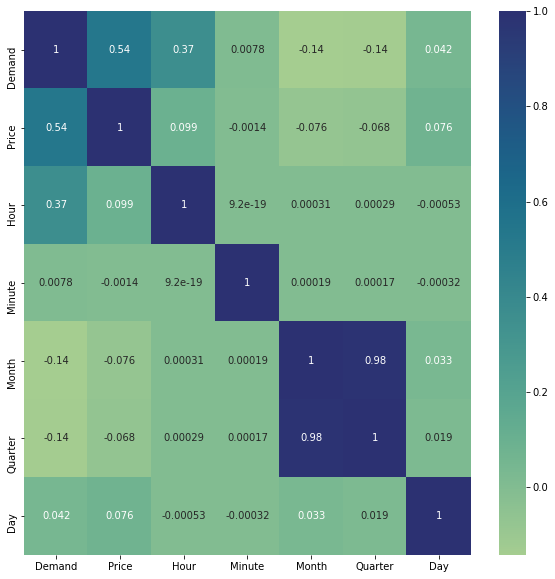

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
features0 = ["Price", "Demand"]
plt.figure(figsize=(10,10))
sns.heatmap(data_price_demand.corr(),annot=True,cmap='crest')
plt.show

In [244]:
me_data.corr(method='pearson')

,Demand,Price,Hour,Minute,Month,Quarter,Day
Demand,1.000000,0.389713,0.041236,-0.014772,-0.207176,-0.188710,0.044778
Price,0.389713,1.000000,0.128223,0.007010,-0.089914,-0.064915,0.060943
Hour,0.041236,0.128223,1.000000,0.045303,0.009460,0.041142,-0.082358
Minute,-0.014772,0.007010,0.045303,1.000000,-0.011935,0.027639,-0.175210
Month,-0.207176,-0.089914,0.009460,-0.011935,1.000000,0.984475,0.036843
Quarter,-0.188710,-0.064915,0.041142,0.027639,0.984475,1.000000,0.025672
Day,0.044778,0.060943,-0.082358,-0.175210,0.036843,0.025672,1.000000


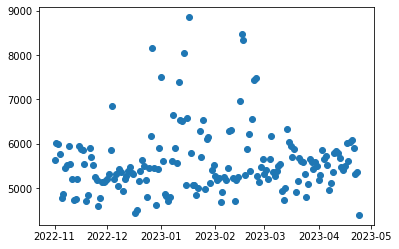

In [245]:
plt.scatter(x=result['Date'], y=result['Demand'])

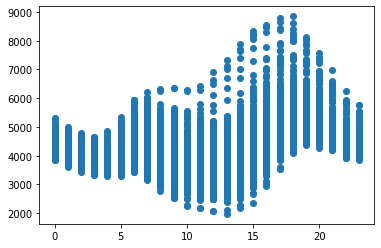

In [246]:
plt.scatter(x=data_price_demand['Hour'], y=data_price_demand['Demand'])

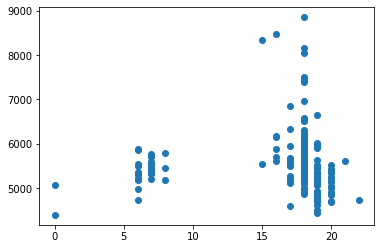

In [247]:
plt.scatter(x=me4_data['Hour'], y=me4_data['Demand'])

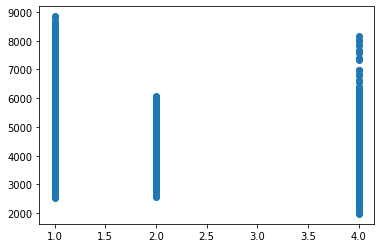

In [248]:
plt.scatter(x=data_price_demand['Quarter'], y=data_price_demand['Demand'])

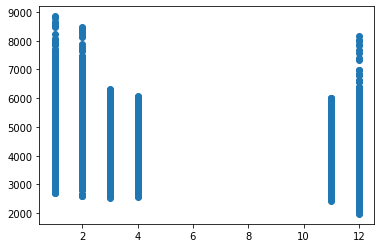

In [249]:
plt.scatter(x=data_price_demand['Month'], y=data_price_demand['Demand'])

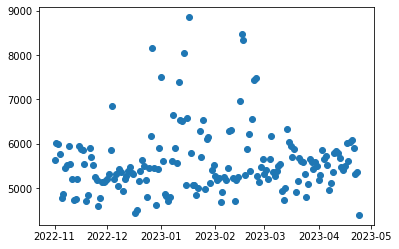

In [250]:
plt.scatter(x=result['Date'], y=result['Demand'])

<AxesSubplot:>

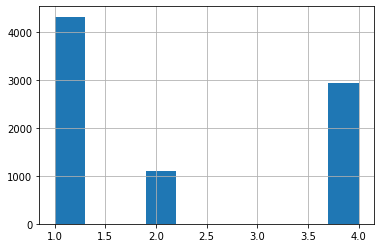

In [251]:
data_price_demand['Quarter'].hist()

<AxesSubplot:>

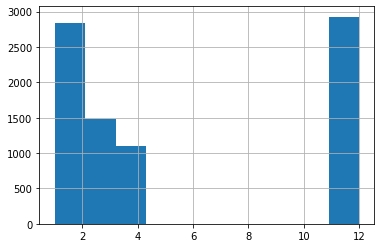

In [252]:
data_price_demand['Month'].hist()

<AxesSubplot:>

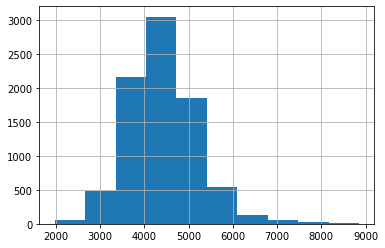

In [253]:
data_price_demand['Demand'].hist()

In [254]:
data_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Location                           174 non-null    object        
 1   Date                               174 non-null    datetime64[ns]
 2   Minimum temperature (°C)           174 non-null    float64       
 3   Maximum temperature (°C)           174 non-null    float64       
 4   Rainfall (mm)                      174 non-null    float64       
 5   Direction of maximum wind gust     174 non-null    object        
 6   Speed of maximum wind gust (km/h)  174 non-null    float64       
 7   Time of maximum wind gust          174 non-null    object        
 8   9am Temperature (°C)               174 non-null    float64       
 9   9am relative humidity (%)          174 non-null    int64         
 10  9am wind direction                 174

In [255]:
# Merge datasets based on date
# data_weather.set_index('Date', inplace=True)
data_weather.info()

result_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Location                           174 non-null    object        
 1   Date                               174 non-null    datetime64[ns]
 2   Minimum temperature (°C)           174 non-null    float64       
 3   Maximum temperature (°C)           174 non-null    float64       
 4   Rainfall (mm)                      174 non-null    float64       
 5   Direction of maximum wind gust     174 non-null    object        
 6   Speed of maximum wind gust (km/h)  174 non-null    float64       
 7   Time of maximum wind gust          174 non-null    object        
 8   9am Temperature (°C)               174 non-null    float64       
 9   9am relative humidity (%)          174 non-null    int64         
 10  9am wind direction                 174

Date
2022-11-01    5627.52
2022-11-02    6018.43
2022-11-03    6004.84
2022-11-04    5757.62
2022-11-05    4783.60
               ...   
2023-04-20    6084.21
2023-04-21    5903.60
2023-04-22    5313.61
2023-04-23    5361.47
2023-04-24    4395.96
Freq: D, Name: Demand, Length: 175, dtype: float64

In [259]:
# me4_data.set_index("Short Date",inplace=True)
me4_data

,Date,Demand,Price,Time,Hour,Minute,Month,Quarter,Day
Short Date,,,,,,,,,
2022-11-01,2022-11-01 19:30:00,5627.52,0.00,2022-11-01 19:30:00,19,30,11,4,1
2022-11-02,2022-11-02 19:30:00,6018.43,55.94,2022-11-02 19:30:00,19,30,11,4,2
2022-11-03,2022-11-03 19:30:00,6004.84,299.50,2022-11-03 19:30:00,19,30,11,4,3
2022-11-04,2022-11-04 07:00:00,5757.62,60.37,2022-11-04 07:00:00,7,0,11,4,4
2022-11-05,2022-11-05 19:30:00,4783.60,177.21,2022-11-05 19:30:00,19,30,11,4,5
...,...,...,...,...,...,...,...,...,...
2023-04-20,2023-04-20 18:30:00,6084.21,314.62,2023-04-20 18:30:00,18,30,4,2,20
2023-04-21,2023-04-21 18:30:00,5903.60,309.23,2023-04-21 18:30:00,18,30,4,2,21
2023-04-22,2023-04-22 18:30:00,5313.61,126.85,2023-04-22 18:30:00,18,30,4,2,22


In [260]:
# data_weather.set_index("Date",inplace=True)
data_weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),9am wind speed (km/h) - 2
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,11:36,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5,13.0
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,11:33,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4,9.0
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,8:07,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3,9.0
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,14:50,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6,6.0
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,11:58,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",2023-04-19,14.4,17.5,1.2,SW,28.0,11:32,14.8,66,WSW,9,1022.0,15.8,53.0,SSW,9.0,1022.1,9.0
170,"Melbourne (Olympic Park), Victoria",2023-04-20,7.8,18.5,0.0,SSW,17.0,12:47,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5,7.0
171,"Melbourne (Olympic Park), Victoria",2023-04-21,11.3,19.0,0.0,SSW,13.0,10:48,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2,6.0
172,"Melbourne (Olympic Park), Victoria",2023-04-22,14.6,19.2,0.0,SSW,22.0,16:09,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7,6.0


In [261]:
merged_data = pd.merge(me4_data, data_weather, left_index=True, right_on='Date')
merged_data

,Date,Date_x,Demand,Price,Time,Hour,Minute,Month,Quarter,Day,...,9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),9am wind speed (km/h) - 2
0,2022-11-01,2022-11-01 19:30:00,5627.52,0.00,2022-11-01 19:30:00,19,30,11,4,1,...,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5,13.0
1,2022-11-02,2022-11-02 19:30:00,6018.43,55.94,2022-11-02 19:30:00,19,30,11,4,2,...,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4,9.0
2,2022-11-03,2022-11-03 19:30:00,6004.84,299.50,2022-11-03 19:30:00,19,30,11,4,3,...,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3,9.0
3,2022-11-04,2022-11-04 07:00:00,5757.62,60.37,2022-11-04 07:00:00,7,0,11,4,4,...,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6,6.0
4,2022-11-05,2022-11-05 19:30:00,4783.60,177.21,2022-11-05 19:30:00,19,30,11,4,5,...,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2023-04-19,2023-04-19 18:00:00,6042.88,282.13,2023-04-19 18:00:00,18,0,4,2,19,...,66,WSW,9,1022.0,15.8,53.0,SSW,9.0,1022.1,9.0
170,2023-04-20,2023-04-20 18:30:00,6084.21,314.62,2023-04-20 18:30:00,18,30,4,2,20,...,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5,7.0
171,2023-04-21,2023-04-21 18:30:00,5903.60,309.23,2023-04-21 18:30:00,18,30,4,2,21,...,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2,6.0
172,2023-04-22,2023-04-22 18:30:00,5313.61,126.85,2023-04-22 18:30:00,18,30,4,2,22,...,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7,6.0


In [262]:
merged_data.to_csv("merged_data.csv")

## Regression heatmat showing relationship directions for all features

<function matplotlib.pyplot.show(close=None, block=None)>

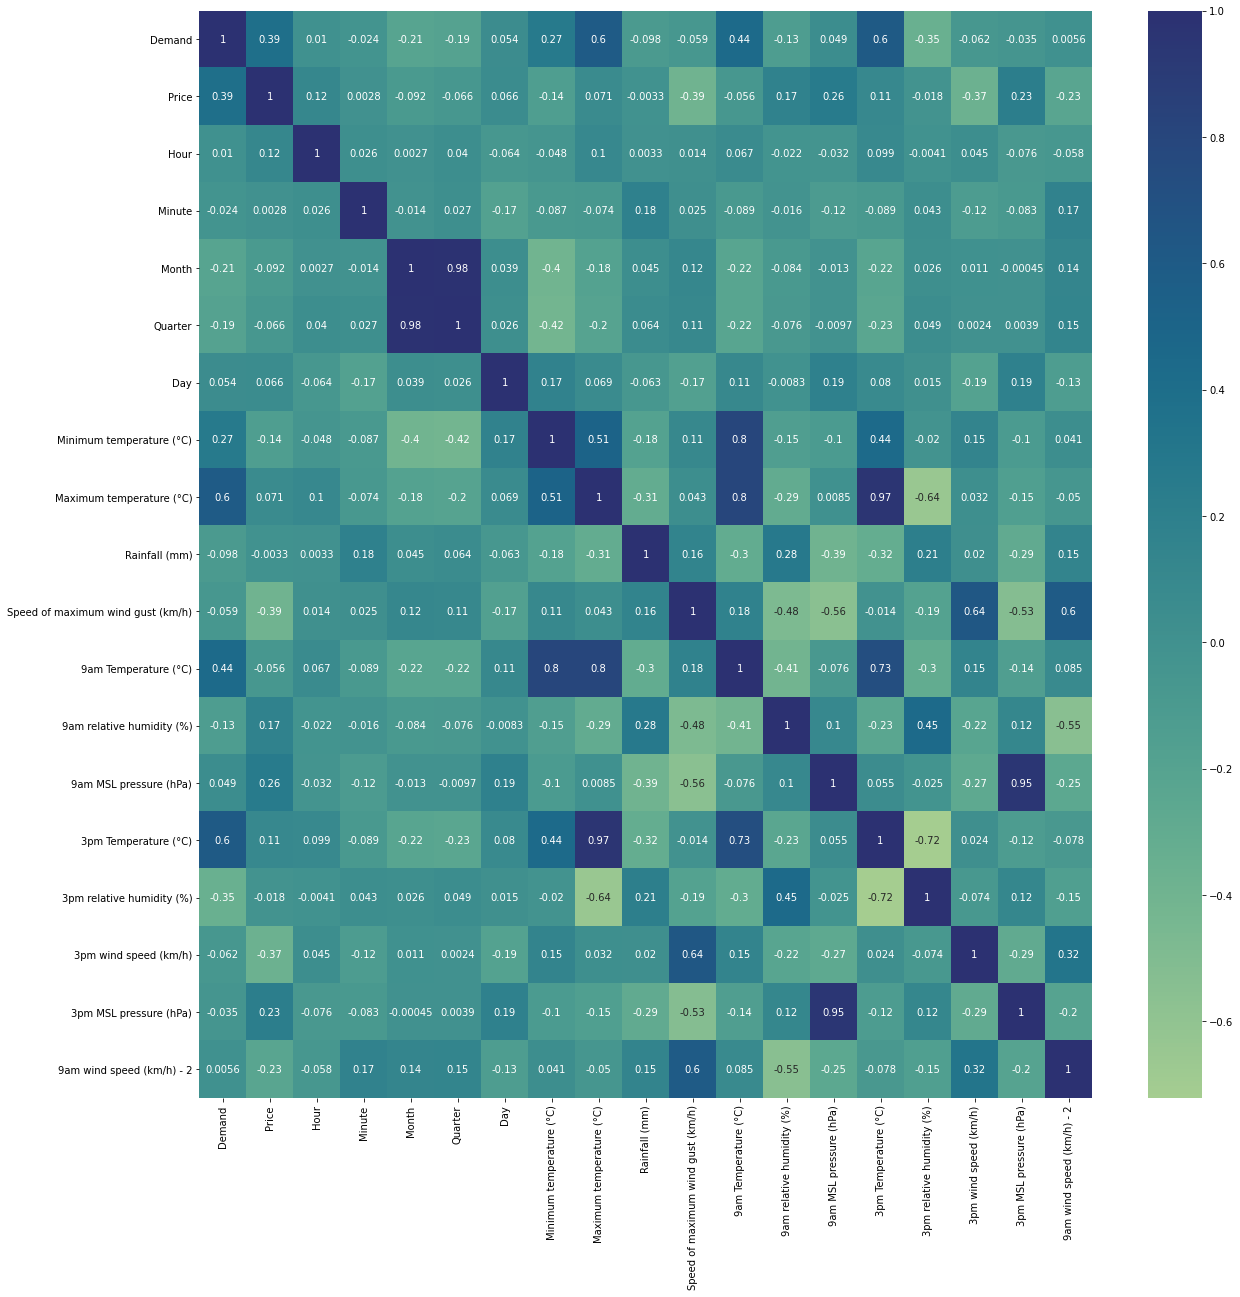

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

merged_data.columns
plt.figure(figsize=(20,20))
sns.heatmap(merged_data.corr(),annot=True,cmap='crest')
plt.show



## Regression plot showing relationship directions for all features

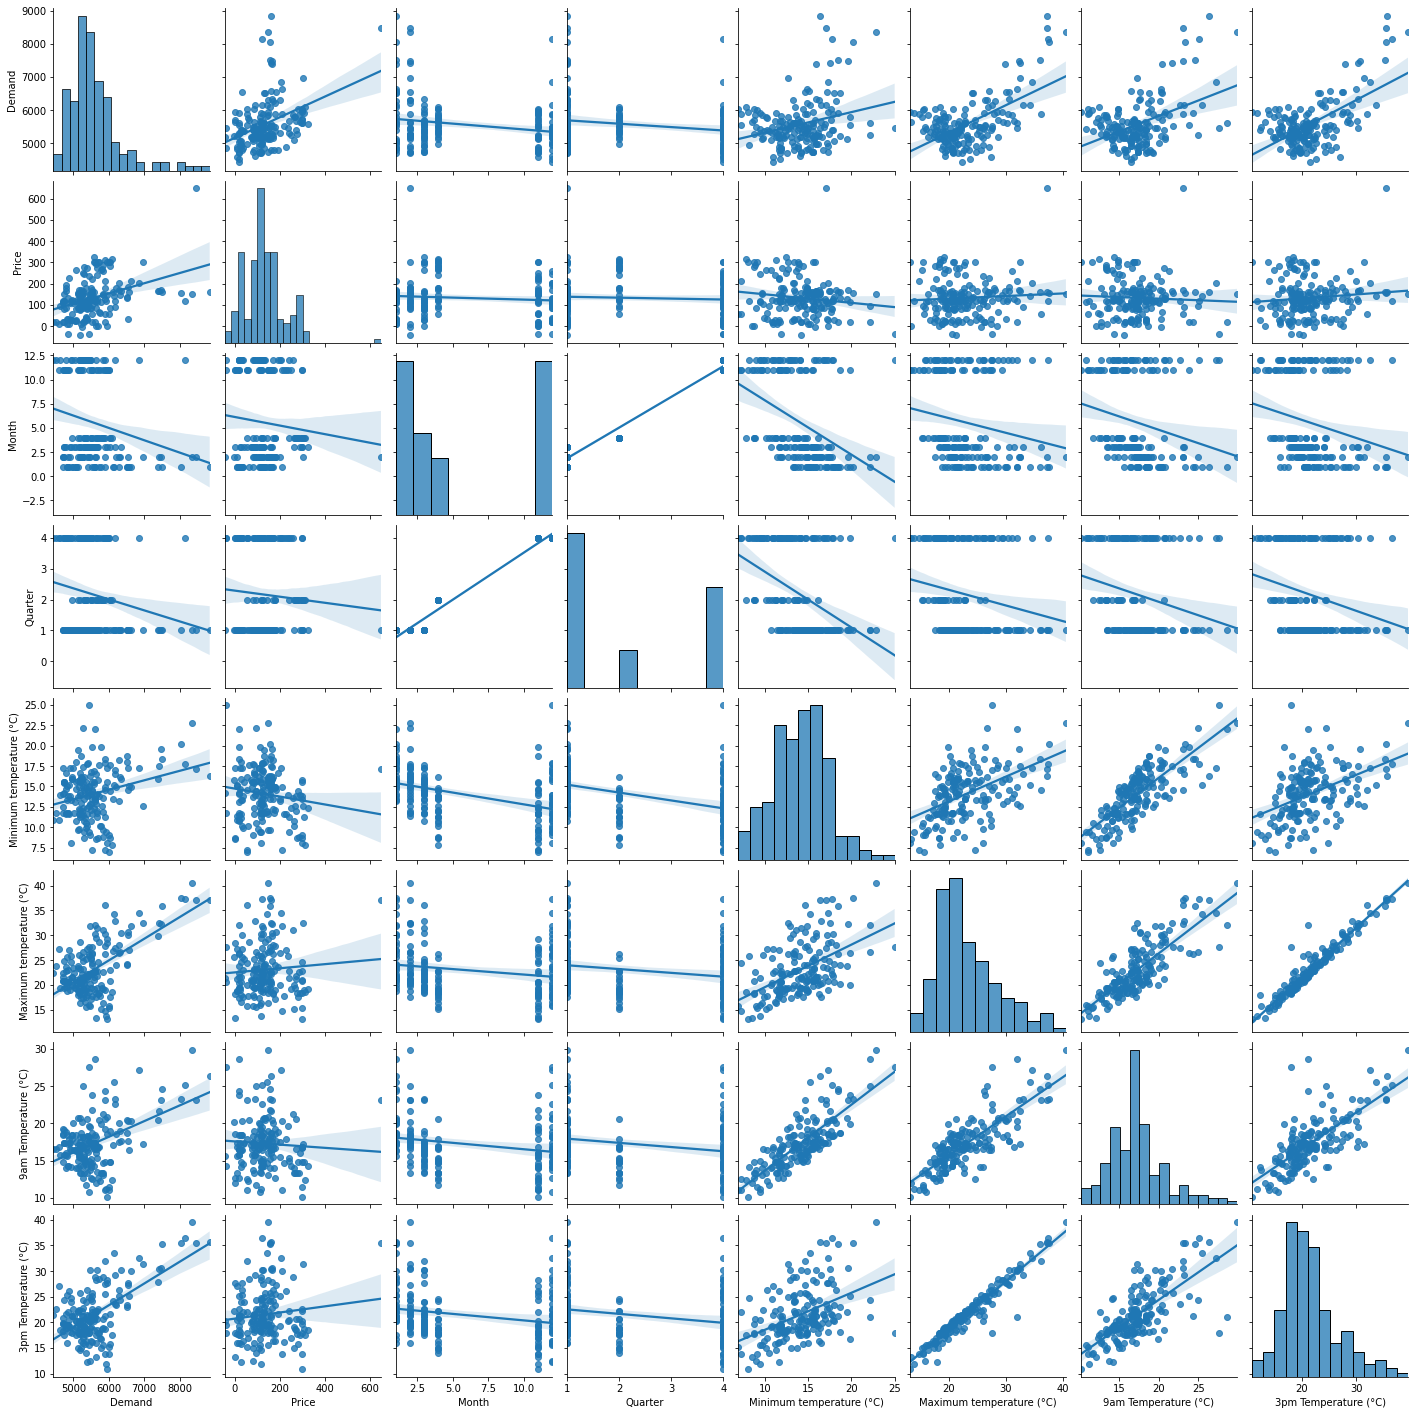

In [266]:
features00 = ['Demand', 'Price', 'Month', 'Quarter', 'Minimum temperature (°C)', 'Maximum temperature (°C)','9am Temperature (°C)', '3pm Temperature (°C)']
sns.pairplot(merged_data[features00], kind="reg")

# Correlation Analysis

In [267]:
selected_features1 =    ['Minimum temperature (°C)',
     'Maximum temperature (°C)',
       'Rainfall (mm)',
       '9am relative humidity (%)',
        '9am wind speed (km/h) - 2', 
       '9am MSL pressure (hPa)',
       '3pm relative humidity (%)',
       '3pm wind speed (km/h)',
       '3pm MSL pressure (hPa)',
       '9am Temperature (°C)', 
        '3pm Temperature (°C)']        

selected_features2 =    ['Minimum temperature (°C)',
     'Maximum temperature (°C)',
        'Price',
       '9am Temperature (°C)', 
        '3pm Temperature (°C)']  


selected_features3 =    ['Minimum temperature (°C)',
     'Maximum temperature (°C)',
        'Price',
       '9am Temperature (°C)', 
        '3pm Temperature (°C)',
                        'Hour']  

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
# Select features and target variable
features1 = merged_data[selected_features1]
features2 = merged_data[selected_features2]
features3 = merged_data[selected_features3]
target = merged_data['Demand']  # Use 'Demand' as the target variable

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features3, target, test_size=0.66, random_state=41)



Mean Absolute Error: 450.18428899280485
Root Mean Squared Error: 553.6650500001558


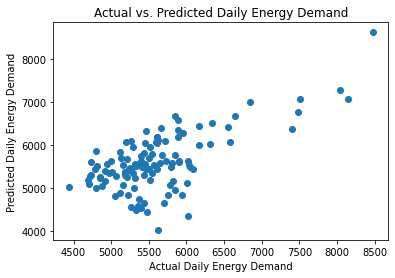

In [269]:
# Choose and train the model
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()


#### The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are common metrics used to evaluate the performance of a regression model.

Mean Absolute Error (MAE):
MAE measures the average absolute difference between the predicted values and the actual values.
It gives you an idea of how far off your predictions are on average.
A lower MAE indicates better model performance.
In your case, a MAE of approximately 382.80 means that, on average, your model's predictions are off by around 382.80 units of the energy demand measurement. For example, if your energy demand values are measured in kilowatt-hours (kWh), this means that, on average, your model's predictions are off by 382.80 kWh.

Root Mean Squared Error (RMSE):
RMSE is another metric that measures the average difference between the predicted values and the actual values, but it emphasizes larger errors more than smaller ones due to the squaring of errors.
RMSE gives you an idea of how spread out the errors are.
Like MAE, a lower RMSE indicates better model performance.
In your case, an RMSE of approximately 490.30 means that the square root of the average squared difference between the predicted and actual values is around 490.30 units. Using the same example of energy demand in kWh, this indicates that the typical deviation of your model's predictions from the actual values is around 490.30 kWh.

Both MAE and RMSE are useful for understanding the overall performance of your regression model. You can use these metrics to compare different models or to track the performance of your model over time. Keep in mind that the interpretation of these metrics depends on the specific context of your problem and the units of the target variable. 

Mean Absolute Error: 443.0232773109243
Root Mean Squared Error: 588.8881855738009
0.2688924264344512


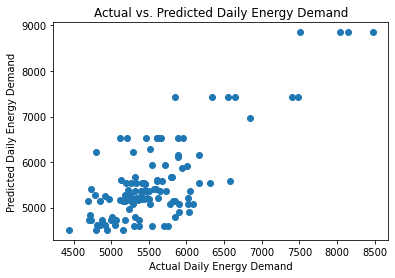

In [270]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_test, y_pred))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()

In [271]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

Mean Absolute Error: 325.1451111111112
Root Mean Squared Error: 427.03297115640464
0.575541131080117


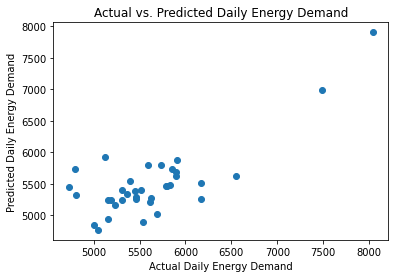

In [272]:
from sklearn.neighbors import KNeighborsRegressor
X_train, X_test, y_train, y_test = train_test_split(features3, target, test_size=0.2, random_state=41)

# Choose and train the KNeighborsRegressor model
model3 = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
model3.fit(X_train, y_train)

# Make predictions
y_pred = model3.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_test, y_pred))

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()

# Energy demand
One common approach is to use the weather conditions from a specific time of the day that aligns with the peak energy demand. In many regions, energy demand tends to peak in the late afternoon or early evening when people return home from work and start using appliances, heating, and cooling systems. Therefore, using weather conditions from around the time when energy demand typically peaks might yield more accurate predictions.

* 3pm (15:00): This time aligns with the potential peak of energy demand in the late afternoon. People are often returning home, turning on appliances, and using energy-intensive equipment.

* 4pm (16:00): Similar to 3pm, this time is also close to the potential peak demand period.

* 5pm (17:00): Energy demand may still be high as people continue to use energy-intensive devices and systems.

## What is peak demand?
Peak demand refers to the times of day when our electricity consumption is at its highest.

Annual peak demand occurs in summer during prolonged heat waves, usually between 5pm and 9pm when most people arrive home and switch on their air conditioners, TVs, lights and other household appliances. Air conditioner use amounts to nearly one third of the power consumed on the hottest days in January, February and March.

https://www.westernpower.com.au/faqs/connect-to-the-network/what-is-peak-demand/what-is-peak-demand/#:~:text=Peak%20demand%20refers%20to%20the,lights%20and%20other%20household%20appliances. 

## Linear Regression

In [274]:
X_train, X_test, y_train, y_test = train_test_split(features2, target, test_size=0.66, random_state=42)

In [275]:
# Preprocessing
from sklearn import linear_model
# # Scaling
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)
from sklearn import impute
# Imputing missing data
imputer = impute.SimpleImputer().fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [276]:
# Instantiate
lm = linear_model.LinearRegression()
# Fit
lm.fit(X_train, y_train)
# Predict
y_pred = lm.predict(X_test)

In [277]:
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_pred[0:5])
print('')

actual MEDV values of the first 5 test data:
19     4847.67
41     5265.03
147    5595.69
77     8850.61
140    5672.06
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[4981.81930837 4886.35885826 5852.31566426 6616.89364499 5311.71959227]



R2 score: 0.44293692423538156
RMSE score: 543.6836226790147


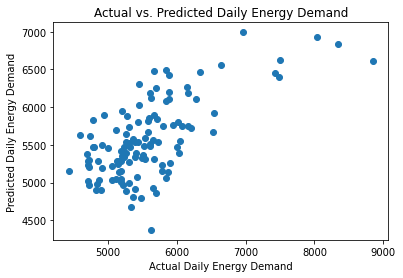

In [278]:
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("R2 score:", r2_score(y_test, y_pred))
print("RMSE score:", mean_squared_error(y_test, y_pred, squared=False))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()

## ML Model Fitting

In [279]:
merged_data.columns

Index(['Date', 'Date_x', 'Demand', 'Price', 'Time', 'Hour', 'Minute', 'Month',
       'Quarter', 'Day', 'Location', 'Date_y', 'Minimum temperature (°C)',
       'Maximum temperature (°C)', 'Rainfall (mm)',
       'Direction of maximum wind gust ', 'Speed of maximum wind gust (km/h)',
       'Time of maximum wind gust', '9am Temperature (°C)',
       '9am relative humidity (%)', '9am wind direction',
       '9am wind speed (km/h)', '9am MSL pressure (hPa)',
       '3pm Temperature (°C)', '3pm relative humidity (%)',
       '3pm wind direction', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)',
       '9am wind speed (km/h) - 2'],
      dtype='object')

## Why cut or qcut


https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

In [370]:



df = pd.DataFrame()

# Define the number of bins you want for each feature
num_bins_demand = 3  ## KEep as 3 for ML Model
num_bins_price = 3
num_bins_min_temp = 4
num_bins_max_temp = 4
num_bins_3pm = 4
num_bins_9am = 4

# Create bin labels
bin_labels_demand = [f'Demand Bin {i}' for i in range(1, num_bins_demand+1)]
bin_labels_price = [f'Price Bin {i}' for i in range(1, num_bins_price+1)]
bin_labels_min_temp = [f'Min Temp Bin {i}' for i in range(1, num_bins_min_temp+1)]
bin_labels_max_temp = [f'Max Temp Bin {i}' for i in range(1, num_bins_max_temp+1)]
bin_labels_3pm = [f'3pm Temp Bin {i}' for i in range(1, num_bins_3pm+1)]
bin_labels_9am = [f'9am Temp Bin {i}' for i in range(1, num_bins_9am+1)]


# # Apply binning to each feature
# df['Demand'] = pd.cut(merged_data['Demand'], bins=num_bins_demand, labels=bin_labels_demand)
# df['Demand number'] = merged_data['Demand']
# df['Price'] = pd.cut(merged_data['Price'], bins=num_bins_price, labels=bin_labels_price)
# df['Min temp'] = pd.cut(merged_data['Minimum temperature (°C)'], bins=num_bins_min_temp, labels=bin_labels_min_temp)
# df['Max temp'] = pd.cut(merged_data['Maximum temperature (°C)'], bins=num_bins_max_temp, labels=bin_labels_max_temp)
# df['3pm temp'] = pd.cut(merged_data['3pm Temperature (°C)'], bins=num_bins_3pm, labels=bin_labels_3pm)
# df['9am temp'] = pd.cut(merged_data['9am Temperature (°C)'], bins=num_bins_9am, labels=bin_labels_9am)


# qcut
qbins = 3

df['Demand'] = pd.qcut(merged_data['Demand'],qbins, labels= bin_labels_demand)
df['Demand number'] = merged_data['Demand']
df['Price'] = pd.qcut(merged_data['Price'],qbins, labels= bin_labels_price)
df['Min temp'] = pd.qcut(merged_data['Minimum temperature (°C)'], qbins)
df['Max temp'] = pd.qcut(merged_data['Maximum temperature (°C)'],  qbins)
df['3pm temp'] = pd.qcut(merged_data['3pm Temperature (°C)'],  qbins)
df['9am temp'] = pd.qcut(merged_data['9am Temperature (°C)'],qbins)
# Display the resulting DataFrame
df.to_csv("bins.csv")

df.head()

,Demand,Demand number,Price,Min temp,Max temp,3pm temp,9am temp
0,Demand Bin 2,5627.52,Price Bin 1,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
1,Demand Bin 3,6018.43,Price Bin 1,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
2,Demand Bin 3,6004.84,Price Bin 3,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
3,Demand Bin 3,5757.62,Price Bin 1,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
4,Demand Bin 1,4783.60,Price Bin 3,"(6.899, 12.6]","(20.267, 24.067]","(10.799000000000001, 18.9]","(10.099, 15.767]"


In [371]:
features3

,Minimum temperature (°C),Maximum temperature (°C),Price,9am Temperature (°C),3pm Temperature (°C),Hour
0,8.5,13.3,0.00,12.0,13.2,19
1,6.9,15.7,55.94,11.0,15.1,19
2,9.1,15.4,299.50,11.5,13.8,19
3,10.2,17.8,60.37,12.3,16.9,7
4,11.8,22.7,177.21,14.0,18.8,19
...,...,...,...,...,...,...
169,14.4,17.5,282.13,14.8,15.8,18
170,7.8,18.5,314.62,12.4,17.5,18
171,11.3,19.0,309.23,14.8,18.6,18
172,14.6,19.2,126.85,15.2,18.8,18


In [372]:
df

,Demand,Demand number,Price,Min temp,Max temp,3pm temp,9am temp
0,Demand Bin 2,5627.52,Price Bin 1,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
1,Demand Bin 3,6018.43,Price Bin 1,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
2,Demand Bin 3,6004.84,Price Bin 3,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
3,Demand Bin 3,5757.62,Price Bin 1,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
4,Demand Bin 1,4783.60,Price Bin 3,"(6.899, 12.6]","(20.267, 24.067]","(10.799000000000001, 18.9]","(10.099, 15.767]"
...,...,...,...,...,...,...,...
169,Demand Bin 3,6042.88,Price Bin 3,"(12.6, 15.5]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
170,Demand Bin 3,6084.21,Price Bin 3,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
171,Demand Bin 3,5903.60,Price Bin 3,"(6.899, 12.6]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"
172,Demand Bin 2,5313.61,Price Bin 2,"(12.6, 15.5]","(13.099, 20.267]","(10.799000000000001, 18.9]","(10.099, 15.767]"


In [373]:
import pandas as pd

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing


target2 = df['Demand']
X_train, X_test, y_train, y_test = train_test_split(features2,
                                                    target2, 
                                                    train_size=0.66,  # 0.66 ML modeelling 
                                                    random_state=124) # 42 ML modeelling
pd.DataFrame(X_train)


,Minimum temperature (°C),Maximum temperature (°C),Price,9am Temperature (°C),3pm Temperature (°C)
54,12.9,31.9,120.00,19.5,30.3
24,11.6,20.6,121.56,14.3,19.2
105,12.0,22.2,144.28,17.1,21.2
145,10.7,19.9,261.84,14.0,19.1
58,14.0,19.3,92.55,15.8,18.4
...,...,...,...,...,...
63,15.2,21.1,9.00,17.4,20.5
163,11.2,22.8,241.01,15.3,22.2
131,15.5,20.7,117.29,17.4,19.6
17,7.2,24.5,57.03,12.5,22.0


In [374]:
y_train

54     Demand Bin 2
24     Demand Bin 1
105    Demand Bin 2
145    Demand Bin 1
58     Demand Bin 1
           ...     
63     Demand Bin 1
163    Demand Bin 3
131    Demand Bin 1
17     Demand Bin 2
150    Demand Bin 2
Name: Demand, Length: 118, dtype: category
Categories (3, object): ['Demand Bin 1' < 'Demand Bin 2' < 'Demand Bin 3']

In [375]:
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


pd.DataFrame(X_train)


,0,1,2,3,4
0,0.331492,0.776860,0.464968,0.508108,0.758755
1,0.259669,0.309917,0.469379,0.227027,0.326848
2,0.281768,0.376033,0.533618,0.378378,0.404669
3,0.209945,0.280992,0.866009,0.210811,0.322957
4,0.392265,0.256198,0.387356,0.308108,0.295720
...,...,...,...,...,...
113,0.458564,0.330579,0.151125,0.394595,0.377432
114,0.237569,0.400826,0.807114,0.281081,0.443580
115,0.475138,0.314050,0.457306,0.394595,0.342412
116,0.016575,0.471074,0.286926,0.129730,0.435798


In [376]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [377]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [378]:
y_pred=knn.predict(X_test)
print(len(y_pred))
y_pred

62


array(['Demand Bin 2', 'Demand Bin 2', 'Demand Bin 3', 'Demand Bin 1',
       'Demand Bin 3', 'Demand Bin 2', 'Demand Bin 3', 'Demand Bin 3',
       'Demand Bin 1', 'Demand Bin 1', 'Demand Bin 3', 'Demand Bin 1',
       'Demand Bin 3', 'Demand Bin 2', 'Demand Bin 1', 'Demand Bin 2',
       'Demand Bin 2', 'Demand Bin 3', 'Demand Bin 3', 'Demand Bin 1',
       'Demand Bin 3', 'Demand Bin 1', 'Demand Bin 3', 'Demand Bin 3',
       'Demand Bin 1', 'Demand Bin 1', 'Demand Bin 1', 'Demand Bin 3',
       'Demand Bin 3', 'Demand Bin 1', 'Demand Bin 3', 'Demand Bin 3',
       'Demand Bin 2', 'Demand Bin 2', 'Demand Bin 1', 'Demand Bin 2',
       'Demand Bin 3', 'Demand Bin 1', 'Demand Bin 3', 'Demand Bin 1',
       'Demand Bin 2', 'Demand Bin 3', 'Demand Bin 2', 'Demand Bin 3',
       'Demand Bin 1', 'Demand Bin 2', 'Demand Bin 3', 'Demand Bin 2',
       'Demand Bin 1', 'Demand Bin 1', 'Demand Bin 1', 'Demand Bin 1',
       'Demand Bin 3', 'Demand Bin 1', 'Demand Bin 3', 'Demand Bin 1',
      

0.45161290322580644


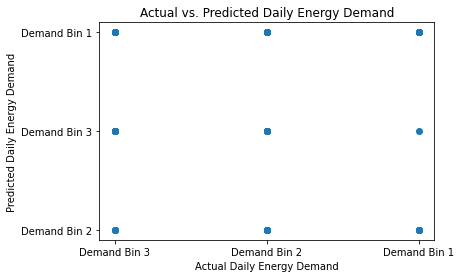

In [379]:
print(accuracy_score(y_test, y_pred))
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()

# DTC

0.5161290322580645


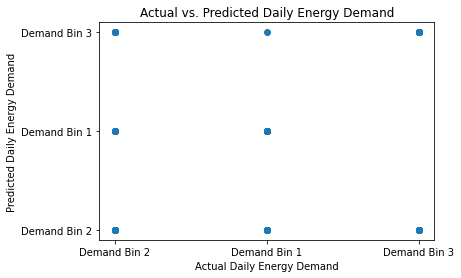

In [380]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(features3,
                                                    target2, 
                                                    train_size=0.66, 
                                                    test_size=0.34)

#scaler = preprocessing.StandardScaler().fit(X_train)
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#extensionation give criteria to decision tree

dt = DecisionTreeClassifier(criterion="entropy",random_state=3, max_depth=5) # Criteria low entropy # stochastic different # Max_depth = inmportant to decide branching of deicison tree
dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Daily Energy Demand')
plt.ylabel('Predicted Daily Energy Demand')
plt.title('Actual vs. Predicted Daily Energy Demand')
plt.show()